THE 1ST STOCK MARKET ANALYSYS PROJECT EVER! Project points are taken from Pierian Data course on Financial Analysis 
and Algorithmic Trading

In [1]:
#Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from matplotlib.dates import DateFormatter
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
%matplotlib inline

In [2]:
#Start and End Dates
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [3]:
#Getting the data 
tesla1 = web.DataReader('TSLA','yahoo',start,end)
gm = web.DataReader('GM','yahoo',start,end)
ford = web.DataReader('F','yahoo',start,end)

In [4]:
#Tesla stock split adjust to match the prices starting at 2012
tesla = tesla1[['High','Low','Open','Close','Adj Close']].apply(lambda x: x*5, raw = True)
tesla['Volume'] = tesla1['Volume']

In [5]:
ford.head()

High    Low   Open  Close      Volume  Adj Close
Date                                                         
2012-01-03  11.25  10.99  11.00  11.13  45709900.0   7.544740
2012-01-04  11.53  11.07  11.15  11.30  79725200.0   7.659981
2012-01-05  11.63  11.24  11.33  11.59  67877500.0   7.856563
2012-01-06  11.80  11.52  11.74  11.71  59840700.0   7.937905
2012-01-09  11.95  11.70  11.83  11.80  53981500.0   7.998916

In [6]:
gm.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  21.180000  20.750000  20.830000  21.049999   9321300.0  16.269407
2012-01-04  21.370001  20.750000  21.049999  21.150000   7856700.0  16.346703
2012-01-05  22.290001  20.959999  21.100000  22.170000  17880600.0  17.135054
2012-01-06  23.030001  22.240000  22.260000  22.920000  18234500.0  17.714725
2012-01-09  23.430000  22.700001  23.200001  22.840000  12084500.0  17.652889

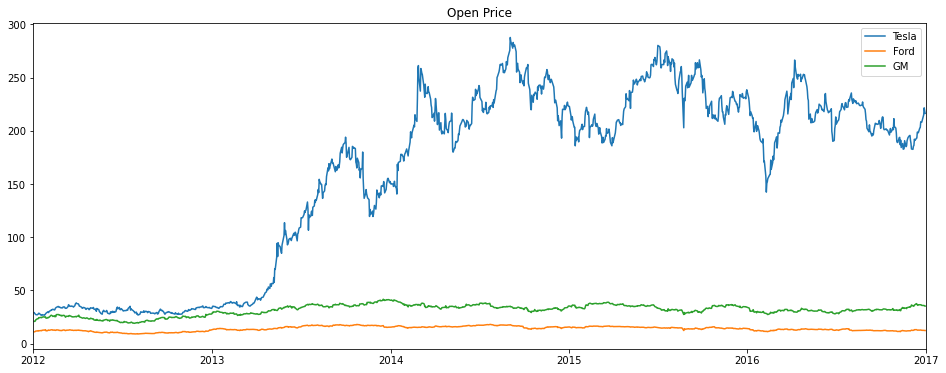

In [7]:
#Plotting the Opening Prices
fig = plt.figure(figsize=(16,6))

plt.plot(tesla.index, tesla['Open'])
plt.plot(ford.index, ford['Open'])
plt.plot(gm.index, gm['Open'])
plt.axis(xmin = start, xmax = end)
plt.title('Open Price')
plt.legend(['Tesla','Ford','GM']);

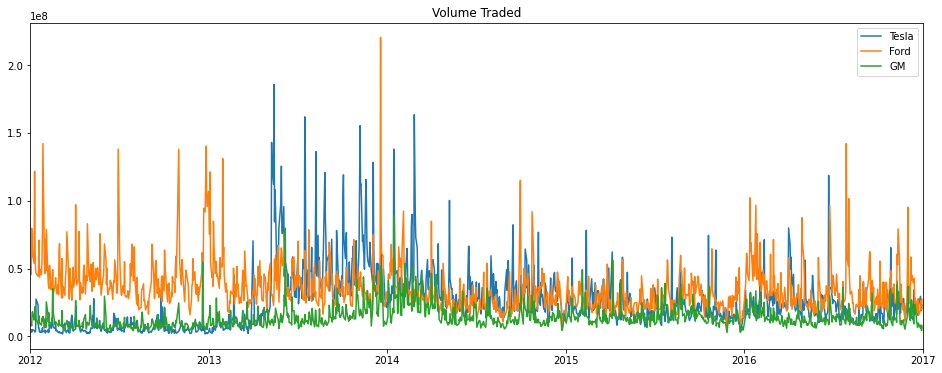

In [8]:
#Plotting the trading volume
fig = plt.figure(figsize=(16,6))

plt.plot(tesla.index, tesla['Volume'])
plt.plot(ford.index, ford['Volume'])
plt.plot(gm.index, gm['Volume'])
plt.axis(xmin = start, xmax = end)
plt.title('Volume Traded')
plt.legend(['Tesla','Ford','GM']);

In [9]:
#Identifying the day when maximum volume for the Ford Stock happened
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

Short Explanation


On this day, Ford CFO Bob Schanks annouced that the company would likely fall short of expectations for the next year profit 
growth. The company announced this as part of the cost for the aggressive product launching back then.
This probably scared investors and on this day some of them sold part of their shares.
See below the fall in share price for the days following 13/12/2013

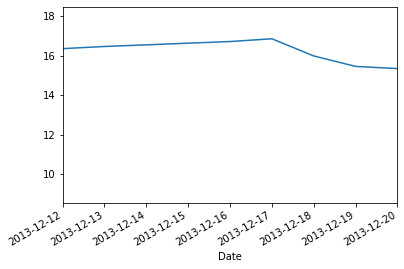

In [10]:
ford['Open'].plot(xlim = ['2013-12-12','2013-12-20' ]);

In [11]:
#Calculating the total traded by multiplying the Open price by the day volume. Aproximation to the Market Cap

tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

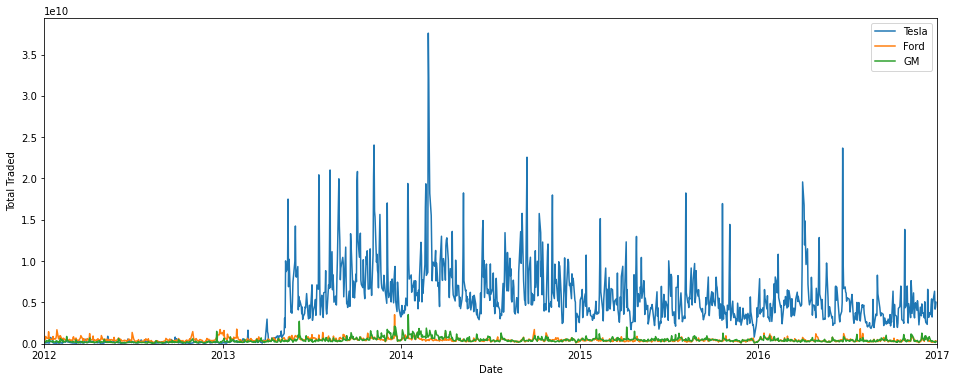

In [12]:
#Plotting
fig = plt.figure(figsize=(16,6))

plt.plot(tesla.index, tesla['Total Traded'])
plt.plot(ford.index, ford['Total Traded'])
plt.plot(gm.index, gm['Total Traded'])
plt.axis(xmin = start, xmax = end, ymin = 0)
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.legend(['Tesla','Ford','GM']);

In [13]:
#Tesla's spike at early 2014
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

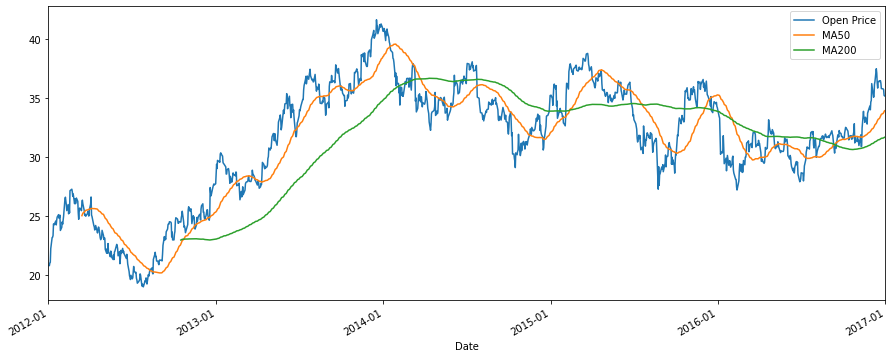

In [14]:
#Plotting moving averages for GM

#50 days Moving Average
gm['Open'].plot(figsize = (15,6), xlim = [start,end]).xaxis.set_major_formatter(DateFormatter("%Y-%m"))
gm['Open'].rolling(50).mean().plot()

#200 days Moving Average
gm['Open'].rolling(200).mean().plot().legend(['Open Price', 'MA50', 'MA200']);

In [15]:
#Create a new Data Frame for the scatter matrix plot

df = pd.DataFrame(index = tesla.index)
df['Tesla Open'] = tesla['Open']
df['GM Open'] = gm['Open']
df['Ford Open'] = ford['Open']

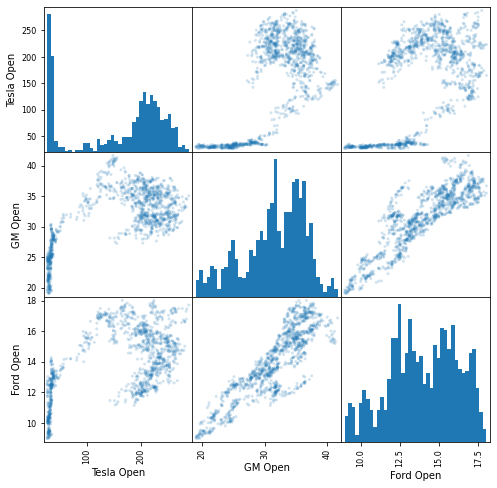

In [16]:
#Scatter matrix plot to compare the data between the stocks

scatter_matrix(df, figsize = (8,8), hist_kwds = {'bins':40}, alpha = 0.2);

In [17]:
#Candlestick graph for Ford stock, January 2012

In [18]:
ford_open = ford['Open'].loc['2012-01-01':'2012-06-30']
ford_high = ford['High'].loc['2012-01-01':'2012-06-30']
ford_low = ford['Low'].loc['2012-01-01':'2012-06-30']
ford_close = ford['Close'].loc['2012-01-01':'2012-06-30']

In [19]:
fig = go.Figure(data = [go.Candlestick(x = ford.index, 
                                       open = ford_open, 
                                       high = ford_high, 
                                       low = ford_low, 
                                       close = ford_close)])

fig.show()

In [20]:
#Daily Percentage Change calculations
tesla['Returns'] = tesla['Close'].pct_change(periods = 1)
ford['Returns'] = ford['Close'].pct_change(periods = 1)
gm['Returns'] = gm['Close'].pct_change(periods = 1)

In [21]:
tesla.head()

High        Low       Open      Close  Adj Close   Volume  \
Date                                                                         
2012-01-03  29.500000  27.650001  28.940001  28.080001  28.080001  4640500   
2012-01-04  28.670001  27.500000  28.210001  27.709999  27.709999  3150500   
2012-01-05  27.930000  26.849999  27.760000  27.119999  27.119999  5027500   
2012-01-06  27.790000  26.410000  27.200000  26.910000  26.910000  4931500   
2012-01-09  27.490001  26.120000  27.000000  27.249999  27.249999  4485000   

            Total Traded   Returns  
Date                                
2012-01-03  1.342961e+08       NaN  
2012-01-04  8.887561e+07 -0.013177  
2012-01-05  1.395634e+08 -0.021292  
2012-01-06  1.341368e+08 -0.007743  
2012-01-09  1.210950e+08  0.012635

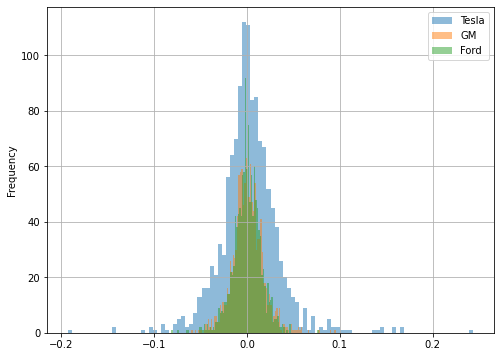

In [22]:
#Histogram for all three variances. This clearly shows that Tesla has the greatest volatility 

tesla['Returns'].plot.hist(figsize = (8,6), bins = 100, alpha = 0.5)
gm['Returns'].plot.hist(bins = 100, alpha = 0.5)
ford['Returns'].plot.hist(bins = 100, alpha = 0.5, grid = True).legend(['Tesla', 'GM', 'Ford']);

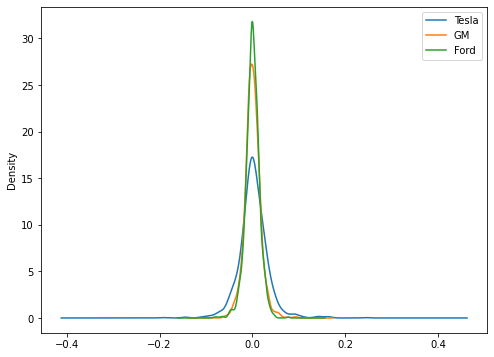

In [23]:
#KDE Plot

tesla['Returns'].plot.kde(figsize = (8,6))
gm['Returns'].plot.kde()
ford['Returns'].plot.kde().legend(['Tesla', 'GM', 'Ford']);

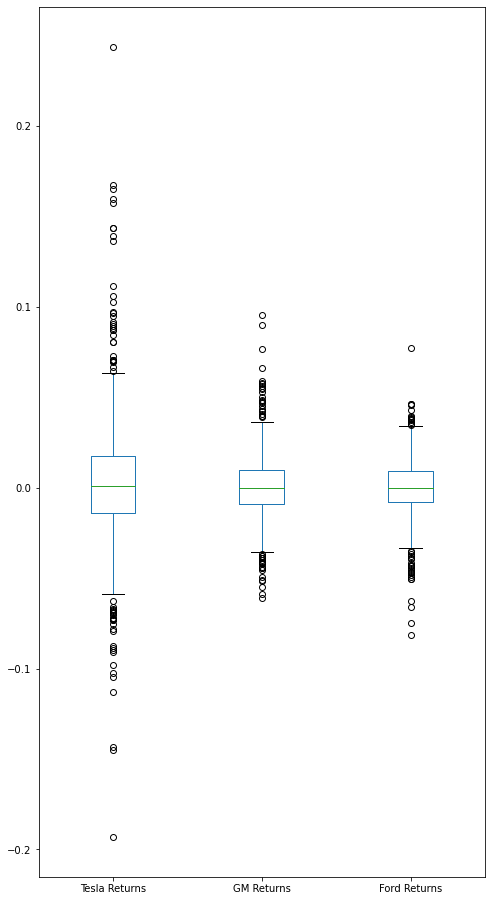

In [24]:
#Box Plot

df = pd.DataFrame(index = tesla.index)
df['Tesla Returns'] = tesla['Returns']
df['GM Returns'] = gm['Returns']
df['Ford Returns'] = ford['Returns']

df.plot.box(figsize = (8,16))

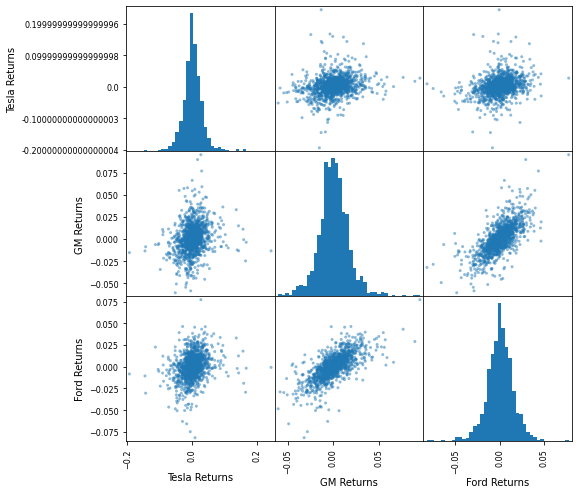

In [25]:
#Scatter matrix plot to compare the data between the stocks

scatter_matrix(df, figsize = (8,8), hist_kwds = {'bins':40});

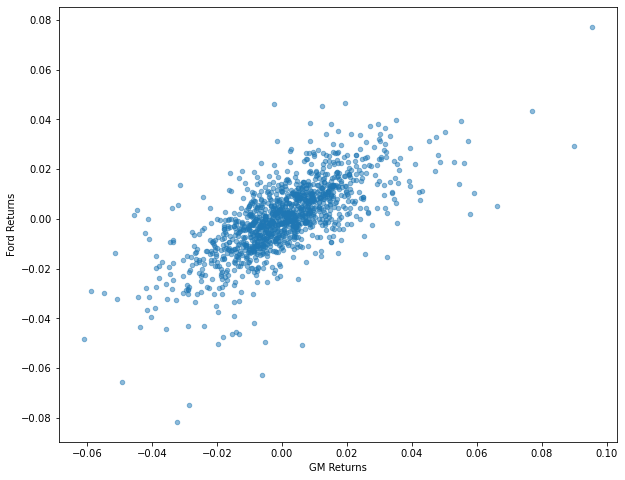

In [26]:
#Scatter plot for comparing the returns for GM and Ford

df.plot.scatter(x = 'GM Returns', y = 'Ford Returns', alpha = 0.5, figsize = (10,8));

In [27]:
#Cumulative Returns Calculation
tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['Returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['Returns']).cumprod()

In [28]:
gm.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2012-01-03  21.180000  20.750000  20.830000  21.049999   9321300.0  16.269407   
2012-01-04  21.370001  20.750000  21.049999  21.150000   7856700.0  16.346703   
2012-01-05  22.290001  20.959999  21.100000  22.170000  17880600.0  17.135054   
2012-01-06  23.030001  22.240000  22.260000  22.920000  18234500.0  17.714725   
2012-01-09  23.430000  22.700001  23.200001  22.840000  12084500.0  17.652889   

            Total Traded   Returns  Cumulative Return  
Date                                                   
2012-01-03  1.941627e+08       NaN                NaN  
2012-01-04  1.653835e+08  0.004751           1.004751  
2012-01-05  3.772807e+08  0.048227           1.053207  
2012-01-06  4.059000e+08  0.033829           1.088836  
2012-01-09  2.803604e+08 -0.003490           1.085036

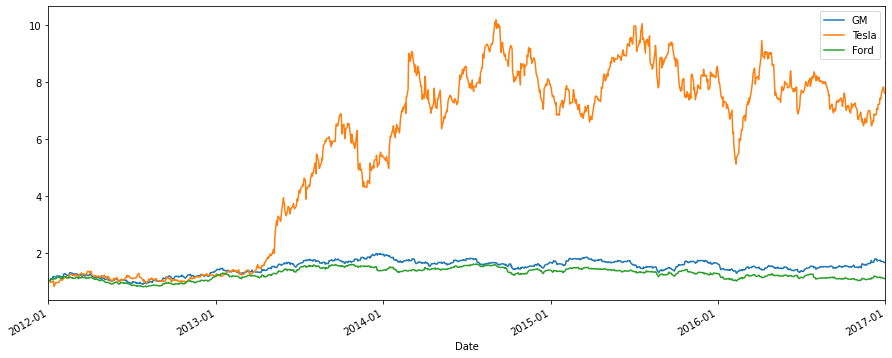

In [29]:
#Plotting
gm['Cumulative Return'].plot(figsize = (15,6), xlim = [start,end]).xaxis.set_major_formatter(DateFormatter("%Y-%m"))
tesla['Cumulative Return'].plot()
ford['Cumulative Return'].plot().legend(['GM', 'Tesla', 'Ford']);